In [1]:
# installing dependencies
import os
from pathlib import Path 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model



In [2]:
# Resizing all the images into a fixed size (256x256 pixel)
p = Path("C:/Users/RAHUL/Documents/Cataract-Prediction-main1/Datasets/ODIR-IMAGE")

# List to store image paths and labels
image_dataset = []
labels = []

# Iterate over subdirectories in the dataset directory
for subdir in p.iterdir():
    if subdir.is_dir():
        print("Processing directory:", subdir)
        
        # Get the label from the directory name
        label = subdir.name
        
        # Iterate over images in each subdirectory
        for image_path in subdir.iterdir():
            # Assuming image files have certain extensions like .jpg, .png, etc.
            if image_path.suffix in ['.jpg', '.png', '.jpeg']:
                print("Image:", image_path)
                # Append the image path to your image dataset list
                image_dataset.append(str(image_path))  # Convert Path object to string
                # Append the label to the labels list
                labels.append(label)


Processing directory: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\0_left.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\103_left.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1062_right.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1083_left.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1084_right.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1102_left.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1102_right.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1115_left.jpg
Image: C:\Users\RAHUL\Documents\Cataract-Prediction-main1\Datasets\ODIR-IMAGE\Cataract\1126

In [3]:
# Convert lists to numpy arrays
X = np.array(image_dataset)
Y = np.array(labels)

print("Total images:", X.shape[0])
print("Total labels:", Y.shape[0])


Total images: 4167
Total labels: 4167


In [4]:
# Shuffle the data
X, Y = shuffle(X, Y, random_state=2)

In [5]:
# Define data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X, 'class': Y}),
    directory=None,
    x_col="filename",
    y_col="class",
    subset="training",
    batch_size=32,
    seed=2,
    shuffle=True,
    class_mode="binary",
    target_size=(256, 256))

valid_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X, 'class': Y}),
    directory=None,
    x_col="filename",
    y_col="class",
    subset="validation",
    batch_size=32,
    seed=2,
    shuffle=True,
    class_mode="binary",
    target_size=(256, 256))


Found 3334 validated image filenames belonging to 2 classes.
Found 833 validated image filenames belonging to 2 classes.


In [7]:
# create a sequential model
model = Sequential()

# 1st conv layer
model.add(Conv2D(filters=32, input_shape=(256, 256, 3), kernel_size=(11, 11), strides=(4, 4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# 2nd conv layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# 3rd conv layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# 4th conv layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# 5th conv layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Flatten
model.add(Flatten())

# 1st FC layer 4096 neurons
model.add(Dense(4096, input_shape=(256 * 256 * 3,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\RAHUL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\RAHUL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,452,673 (81.84 MB)

 Trainable params: 21,452,673 (81.84 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Save the model
save_model(model, 'CataractModel.h5')


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 32,
    epochs=50)


Epoch 1/50


C:\Users\RAHUL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 87s 782ms/step - accuracy: 0.6902 - loss: 0.6042 - val_accuracy: 0.6707 - val_loss: 0.6214
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 0.3629 - val_accuracy: 1.0000 - val_loss: 0.1837
Epoch 3/50


C:\Users\RAHUL\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


104/104 ━━━━━━━━━━━━━━━━━━━━ 57s 546ms/step - accuracy: 0.7206 - loss: 0.5436 - val_accuracy: 0.7885 - val_loss: 0.4583
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.7812 - loss: 0.2201 - val_accuracy: 1.0000 - val_loss: 0.0702
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 49s 471ms/step - accuracy: 0.8552 - loss: 0.3966 - val_accuracy: 0.8281 - val_loss: 0.4235
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.1489 - val_accuracy: 1.0000 - val_loss: 0.0502
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 49s 467ms/step - accuracy: 0.8754 - loss: 0.3468 - val_accuracy: 0.8822 - val_loss: 0.3388
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.8750 - loss: 0.2211 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 50s 477ms/step - accuracy: 0.8660 - loss: 0.3696 - val_accuracy: 0.8882 - val_loss: 0.3505
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9062 - loss: 0.1354 - val_accu

In [15]:

# Evaluate the model
eval_result = model.evaluate(valid_generator)
print(f"Model evaluation (loss, accuracy): {eval_result}")



27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9603 - loss: 0.1388
Model evaluation (loss, accuracy): [0.11589709669351578, 0.9591836929321289]


105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step
Training Data - True Positives: 1609
Training Data - True Negatives: 290
Training Data - False Positives: 730
Training Data - False Negatives: 705
Training Data - Accuracy: 0.5695860827834434
Training Data - Precision: 0.6879008123129543
Training Data - Recall: 0.6953327571305099
Training Data - F1 Score: 0.6915968192563938


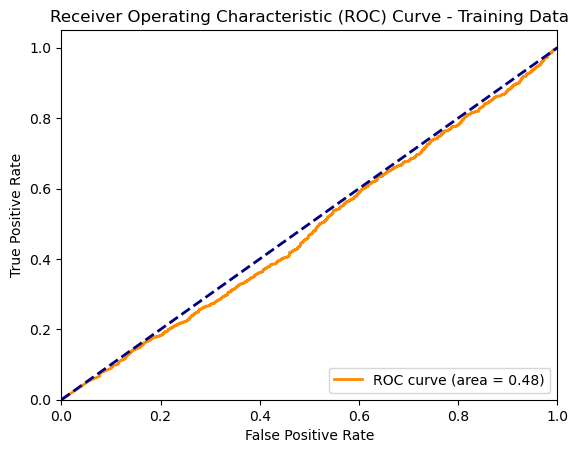

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 585ms/step - accuracy: 0.9715 - loss: 0.0725
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 559ms/step - accuracy: 0.9742 - loss: 0.0744
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 57s 538ms/step - accuracy: 0.9463 - loss: 0.1219
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 55s 520ms/step - accuracy: 0.9701 - loss: 0.0800
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 57s 535ms/step - accuracy: 0.9782 - loss: 0.0631
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 64s 604ms/step - accuracy: 0.9632 - loss: 0.1113
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 67s 628ms/step - accuracy: 0.9846 - loss: 0.0546
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 58s 539ms/step - accuracy: 0.9811 - loss: 0.0553
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 52s 489ms/step - accuracy: 0.9651 - loss: 0.1027
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 52s 487ms/step - accuracy: 0.9655 - loss: 0.0989


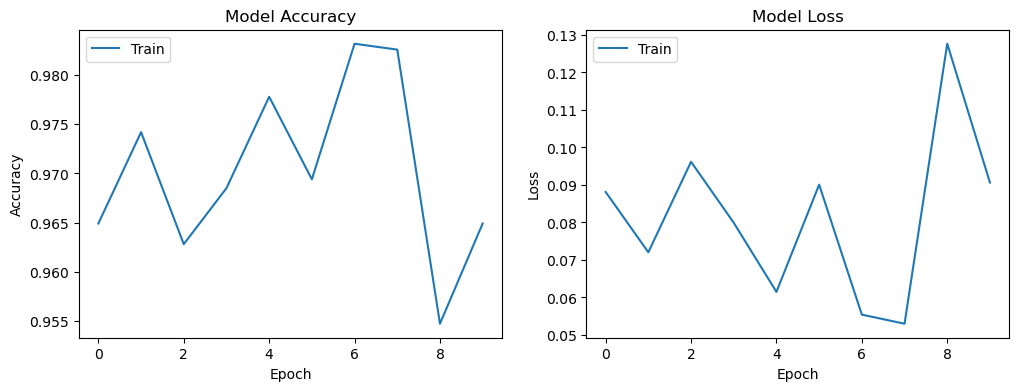

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Reset the generator to make sure we start from the beginning
train_generator.reset()

# Get the true labels for the training data
y_train_true = train_generator.classes

# Get the predicted probabilities for the training data
y_train_pred_proba = model.predict(train_generator, steps=train_generator.samples // train_generator.batch_size + 1)

# Define a threshold (e.g., 0.5)
threshold = 0.5

# Binarize the predicted probabilities based on the threshold
y_train_pred_binary = (y_train_pred_proba > threshold).astype(int)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train_true, y_train_pred_binary).ravel()

# Print confusion matrix results
print(f"Training Data - True Positives: {tp}")
print(f"Training Data - True Negatives: {tn}")
print(f"Training Data - False Positives: {fp}")
print(f"Training Data - False Negatives: {fn}")

# Calculate and print other metrics
train_accuracy = accuracy_score(y_train_true, y_train_pred_binary)
train_precision = precision_score(y_train_true, y_train_pred_binary)
train_recall = recall_score(y_train_true, y_train_pred_binary)
train_f1 = f1_score(y_train_true, y_train_pred_binary)

print(f"Training Data - Accuracy: {train_accuracy}")
print(f"Training Data - Precision: {train_precision}")
print(f"Training Data - Recall: {train_recall}")
print(f"Training Data - F1 Score: {train_f1}")

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train_true, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

# Assuming you have the training history from model.fit()
# For example:
history = model.fit(train_generator, epochs=10)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

